# **PART A: Predicting Signal Quality Using Machine Learning**

## **Domain: Electronics and Telecommunication**

### **Context**
A communications equipment manufacturing company has a product responsible for emitting informative signals. The company wants to build a machine learning model that can predict the equipment’s signal quality based on various measurable parameters.

### **Data Description**
The dataset contains information on multiple signal tests performed, including:
- **Parameters**: Various measurable signal attributes.
- **Signal_Quality**: The final signal strength or quality.

### **Project Objective**
To develop a classification model that can accurately predict signal quality based on the provided signal parameters.

---


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
# Preventing scientific notation.
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/Python Course/neural network'

In [5]:
#  store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

In [6]:
signal_df = pd.read_csv(f'{path}/NN Project Data - Signal.csv')


In [7]:
signal_df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5


In [12]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
signal_df.shape

(1599, 12)

In [8]:
signal_df.isna().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


In [14]:
# Check for missing values percentage
signal_df.isnull().sum()*100/len(signal_df)

,0
Parameter 1,0.000
Parameter 2,0.000
Parameter 3,0.000
Parameter 4,0.000
Parameter 5,0.000
Parameter 6,0.000
Parameter 7,0.000
Parameter 8,0.000
Parameter 9,0.000
Parameter 10,0.000


In [21]:
columns=signal_df.columns
for col in columns:
  print(col)
  print(signal_df[col].nunique())



Parameter 1
96
Parameter 2
143
Parameter 3
80
Parameter 4
91
Parameter 5
153
Parameter 6
60
Parameter 7
144
Parameter 8
436
Parameter 9
89
Parameter 10
96
Parameter 11
65
Signal_Strength
6


In [18]:
# Show duplicate rows in the dataframe
signal_df[signal_df.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
11,7.500,0.500,0.360,6.100,0.071,17.000,102.000,0.998,3.350,0.800,10.500,5
27,7.900,0.430,0.210,1.600,0.106,10.000,37.000,0.997,3.170,0.910,9.500,5
40,7.300,0.450,0.360,5.900,0.074,12.000,87.000,0.998,3.330,0.830,10.500,5
65,7.200,0.725,0.050,4.650,0.086,4.000,11.000,0.996,3.410,0.390,10.900,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.200,0.695,0.130,2.000,0.076,12.000,20.000,0.995,3.290,0.540,10.100,5
1564,7.200,0.695,0.130,2.000,0.076,12.000,20.000,0.995,3.290,0.540,10.100,5
1567,7.200,0.695,0.130,2.000,0.076,12.000,20.000,0.995,3.290,0.540,10.100,5
1581,6.200,0.560,0.090,1.700,0.053,24.000,32.000,0.994,3.540,0.600,11.300,5


In [22]:
# dropping duplicate values
signal_df.drop_duplicates(keep=False,inplace=True)
signal_df[signal_df.duplicated()]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength


### Utils

In [23]:
def plot_bar_chart_percentage(df, column_name, xlabel, pellete, bar_width=0.6):
    """
    Plots the percentage distribution of a specified categorical column in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The name of the column to analyze.
    - colors: List of colors for the bar plot.
    - figsize: Tuple specifying the figure size.
    - bar_width: Width of the bars in the bar plot.
    """
    # Calculate the percentage of each category in the specified column
    percentages = df[column_name].value_counts(normalize=True)*100
    percentages = percentages.reset_index().rename(columns={ column_name: column_name, 'proportion': 'percent'})
    n=df[column_name].nunique()
    # Increase figure size for better readability
    plt.figure(figsize=(n+1,6))

    # Plot the bar plot with reduced bar width
    ax=sns.barplot(x=column_name, y='percent', data=percentages, palette=pellete,hue=column_name, width=bar_width)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    # Set labels and title
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(f'Overview of {xlabel}')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.legend([],[], frameon=False)
    plt.show()


In [24]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [38]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)


    return plt

In [26]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [27]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [28]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [29]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [30]:
def create_catplot_with_annotations(df, x, hue, col, colors, height=4, aspect=1, title="Catplot with Annotations", annotation_color='b'):
    """
    Creates a catplot with count kind, a color palette, axis labels, title, and annotations.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    hue (str): The name of the column for hue.
    col (str): The name of the column for creating subplots.
    colors (tuple): A tuple of two colors for the palette.
    height (int): The height of each facet (default is 4).
    aspect (float): Aspect ratio of each facet (default is 1).
    title (str): The title of the plot (default is "Catplot with Annotations").
    annotation_color (str): The color of the annotations (default is 'b').
    """
    # Create the catplot
    catplot = sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=height, aspect=aspect, palette=colors)

    # Set axis labels and title
    catplot.set_axis_labels(x, 'Count')
    catplot.set_titles(col_template="{col_name}")
    catplot.fig.suptitle(title, y=1.02)  # Title with a bit of padding

    # Add annotations with specified color
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                        color=annotation_color)

In [31]:
def distribution_plot_wrt_target(data, predictor, target, xlabel1, xlabel2):
    """
    Plots the distribution of a predictor variable with respect to a target variable.

    This function creates a 2x2 grid of plots, including:
    1. Histograms with KDE for each unique value of the target variable.
    2. A boxplot showing the distribution of the predictor variable grouped by the target variable.
    3. A boxplot showing the distribution of the predictor variable grouped by the target variable without outliers.

    Parameters:
    - data (DataFrame): The input DataFrame containing the data.
    - predictor (str): The name of the predictor variable (column) to visualize.
    - target (str): The name of the target variable (column) to group the data by.
    - xlabel1 (str): Label for the x-axis of the first histogram.
    - xlabel2 (str): Label for the x-axis of the second histogram.

    Returns:
    - None: Displays the plots but does not return any values.
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    # Histogram for the first unique target value
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color=colors[0],
        stat="density",
    )
    axs[0, 0].set_xlabel(xlabel1)

    # Histogram for the second unique target value
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color=colors[1],
        stat="density",
    )
    axs[0, 1].set_xlabel(xlabel2)

    # Boxplot with outliers
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], color=colors[0])

    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        color=colors[1],
        showmeans=True
    )

    plt.tight_layout()
    plt.show()


In [34]:
signal_df.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

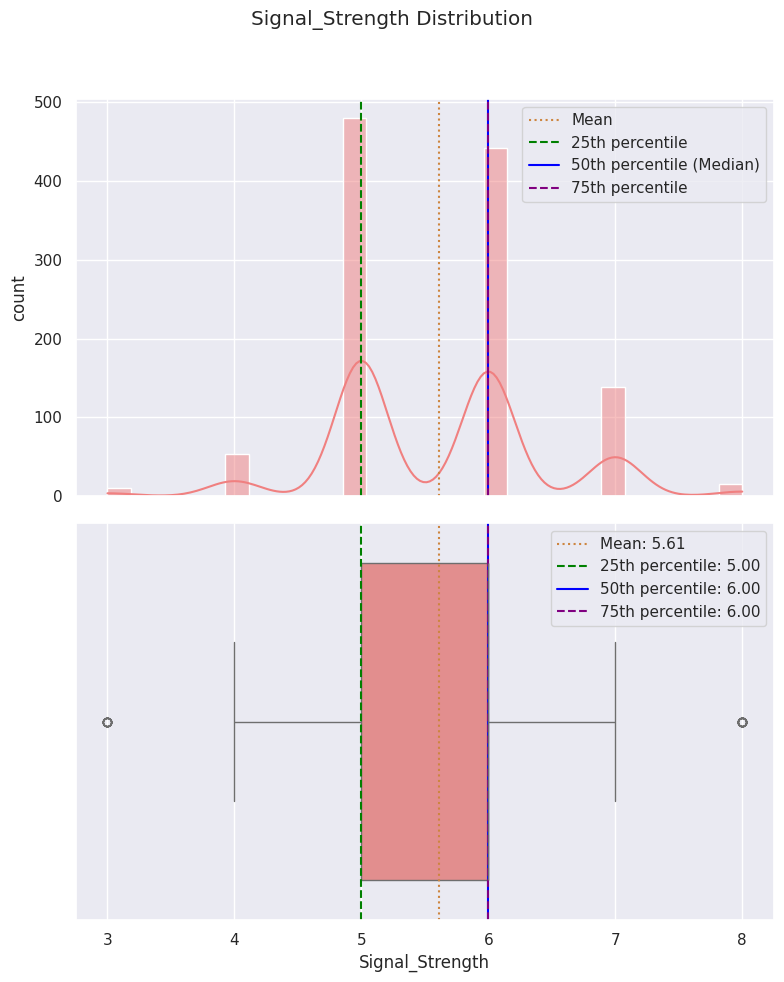

In [35]:
plot_histogram_and_boxplot(signal_df,'Signal_Strength','Signal_Strength','count','Signal_Strength Distribution')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

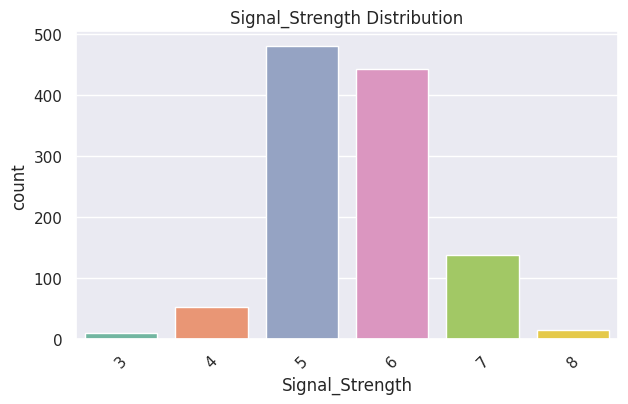

In [39]:
draw_count_plot(signal_df,'Signal_Strength','Signal_Strength','count','Signal_Strength Distribution')